In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
from matplotlib import font_manager, rc
import matplotlib
import platform

In [66]:
# 한글꺠짐 처리(windows, mac)
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
# 차트에 마이너스 부분이 깨질때 처리
matplotlib.rcParams['axes.unicode_minus'] = False

In [67]:
# 각 브랜드별 DataFrame 생성
burger_king_df = pd.read_excel('./BurgerKing/BurgerKing_all_store.xlsx')
kfc_df = pd.read_excel('./KFC/KFC_all_store.xlsx')
mcdonalds_df = pd.read_excel('./Mcdonalds/mcdonalds_all_store.xlsx')
lotteria_df = pd.read_excel('./Lotteria/Lotteria_all_store.xlsx')

In [68]:
burger_king_df.head()

,지점명,주소
0,선릉역점,서울특별시 강남구 선릉로 429
1,대치역점,서울특별시 강남구 남부순환로 2936
2,차병원사거리점,서울특별시 강남구 봉은사로 179
3,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층
4,청담점,서울특별시 강남구 선릉로 812


In [69]:
kfc_df.head()

,매장명,매장 주소
0,원주단계DT,강원 원주시 북원로 2266 (단계동) KFC원주단계DT
1,춘천이마트,강원 춘천시 경춘로 2341 (온의동) 이마트 춘천점 1층 푸드코트 內
2,춘천석사,강원 춘천시 영서로 2027 (석사동)
3,행신역,경기 고양시 덕양구 충장로 8 (행신동)
4,화정,경기 고양시 덕양구 화신로272번길 57 (화정동)


In [70]:
mcdonalds_df.head()

,매장명,매장 주소
0,고양 삼송 DT,경기 고양시 덕양구 고양대로 1948
1,서울시청,서울 중구 남대문로9길 51 효덕빌딩
2,한신,서울 노원구 한글비석로 57 (하계동)
3,영천DT,경북 영천시 호국로 141
4,대구동호DT,대구 동구 안심로 403


In [71]:
lotteria_df.head()

,지점명,주소
0,가평휴게소(상),경기 가평군 설악면 미사리로 544
1,아산장재,서울 용산구 한강대로71길 47
2,수원파장,경기 수원시 장안구 파장로 91
3,롯데더몰여수,전남 여수시 국포1로 36
4,김포마산,경기 김포시 김포한강8로148번길 5


In [72]:
burger_king_df.shape, kfc_df.shape, mcdonalds_df.shape, lotteria_df.shape

((423, 2), (187, 2), (405, 2), (1310, 2))

In [73]:
# 각 DataFrame에 브랜드 열 생성
burger_king_df['브랜드'] = '버거킹'
kfc_df['브랜드'] = 'KFC'
mcdonalds_df['브랜드'] = '맥도날드'
lotteria_df['브랜드'] = '롯데리아'

In [74]:
# 중복 데이터 확인
print( burger_king_df['지점명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( kfc_df['매장명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( mcdonalds_df['매장명'].value_counts().sort_values(ascending=False).head(1) )
print()
print( lotteria_df['지점명'].value_counts().sort_values(ascending=False).head(1) )

인천구월점    2
Name: 지점명, dtype: int64

하단역    1
Name: 매장명, dtype: int64

동성로교보    1
Name: 매장명, dtype: int64

부천뉴코아    2
Name: 지점명, dtype: int64


In [76]:
# 중복 제거
burger_king_df.drop_duplicates('지점명', keep='first', inplace=True)
kfc_df.drop_duplicates('매장명', keep='first', inplace=True)
mcdonalds_df.drop_duplicates('매장명', keep='first', inplace=True)
lotteria_df.drop_duplicates('지점명', keep='first', inplace=True)
burger_king_df.shape, kfc_df.shape, mcdonalds_df.shape, lotteria_df.shape

((410, 3), (187, 3), (405, 3), (1200, 3))

In [33]:
# 빈 DataFrame 생성 후 각 브랜드별 DataFrame 추가
burger_df = pd.DataFrame()

burger_df = pd.concat([burger_df, burger_king_df])
burger_df = pd.concat([burger_df, kfc_df])
burger_df = pd.concat([burger_df, mcdonalds_df])
# burger_df = pd.concat([burger_df, lotteria_df])

# DataFrame 인덱스 재설정
burger_df.reset_index(drop=True, inplace=True)

C:\Users\Su\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """
C:\Users\Su\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [34]:
burger_df.head()

,매장 주소,매장명,브랜드,주소,지점명
0,NaN,NaN,버거킹,서울특별시 강남구 선릉로 429,선릉역점
1,NaN,NaN,버거킹,서울특별시 강남구 남부순환로 2936,대치역점
2,NaN,NaN,버거킹,서울특별시 강남구 봉은사로 179,차병원사거리점
3,NaN,NaN,버거킹,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,강남도곡점
4,NaN,NaN,버거킹,서울특별시 강남구 선릉로 812,청담점


In [35]:
# 매장명, 매장 주소를 지점명, 주소로 통일
burger_df['지점명'].fillna(burger_df['매장명'], inplace=True)
burger_df['주소'].fillna(burger_df['매장 주소'], inplace=True)
print(burger_df.isnull().sum())
burger_df.head()

매장 주소    410
매장명      410
브랜드        0
주소         0
지점명        0
dtype: int64


,매장 주소,매장명,브랜드,주소,지점명
0,NaN,NaN,버거킹,서울특별시 강남구 선릉로 429,선릉역점
1,NaN,NaN,버거킹,서울특별시 강남구 남부순환로 2936,대치역점
2,NaN,NaN,버거킹,서울특별시 강남구 봉은사로 179,차병원사거리점
3,NaN,NaN,버거킹,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,강남도곡점
4,NaN,NaN,버거킹,서울특별시 강남구 선릉로 812,청담점


In [36]:
# 매장명, 매장 주소 열 삭제
burger_df.drop(['매장명', '매장 주소'], axis=1, inplace=True)
burger_df

,브랜드,주소,지점명
0,버거킹,서울특별시 강남구 선릉로 429,선릉역점
1,버거킹,서울특별시 강남구 남부순환로 2936,대치역점
2,버거킹,서울특별시 강남구 봉은사로 179,차병원사거리점
3,버거킹,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,강남도곡점
4,버거킹,서울특별시 강남구 선릉로 812,청담점
5,버거킹,서울특별시 강남구 광평로 280,수서점
6,버거킹,서울특별시 강남구 청담동 영동대로 716,청담주성점
7,버거킹,서울특별시 강남구 강남대로 406,강남대로점
8,버거킹,서울특별시 강남구 도곡로 447,대치점
9,버거킹,서울특별시 강남구 봉은사로 502버거킹 삼성중앙역점,삼성중앙역점


In [37]:
# 주소를 시군구별로 나눠서 열 추가 후 재정렬
burger_df[['주소1', '주소2', '주소3']] = pd.DataFrame(burger_df['주소'].str.strip().str.split(' ', 2).tolist())
burger_df.reindex(columns=['브랜드', '지점명', '주소', '주소1', '주소2', '주소3'])

,브랜드,지점명,주소,주소1,주소2,주소3
0,버거킹,선릉역점,서울특별시 강남구 선릉로 429,서울특별시,강남구,선릉로 429
1,버거킹,대치역점,서울특별시 강남구 남부순환로 2936,서울특별시,강남구,남부순환로 2936
2,버거킹,차병원사거리점,서울특별시 강남구 봉은사로 179,서울특별시,강남구,봉은사로 179
3,버거킹,강남도곡점,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,버거킹,청담점,서울특별시 강남구 선릉로 812,서울특별시,강남구,선릉로 812
5,버거킹,수서점,서울특별시 강남구 광평로 280,서울특별시,강남구,광평로 280
6,버거킹,청담주성점,서울특별시 강남구 청담동 영동대로 716,서울특별시,강남구,청담동 영동대로 716
7,버거킹,강남대로점,서울특별시 강남구 강남대로 406,서울특별시,강남구,강남대로 406
8,버거킹,대치점,서울특별시 강남구 도곡로 447,서울특별시,강남구,도곡로 447
9,버거킹,삼성중앙역점,서울특별시 강남구 봉은사로 502버거킹 삼성중앙역점,서울특별시,강남구,봉은사로 502버거킹 삼성중앙역점


In [38]:
# 시도 값 확인
burger_df['주소1'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울',
       '세종특별자치시', '울산', '인천', '전남', '전북', '충남', '충북', '서울시'], dtype=object)

In [39]:
# 줄여쓴 구역을 풀어서 다시 입력
burger_df['주소1'] = burger_df['주소1'].replace({'서울시':'서울특별시',
                                                '서울':'서울특별시',
                                                '부산':'부산광역시',
                                                '대구':'대구광역시',
                                                '인천':'인천광역시',
                                                '광주':'광주광역시',
                                                '대전':'대전광역시',
                                                '울산':'울산광역시',
                                                '세종':'세종특별자치시',
                                                '경기':'경기도',
                                                '강원':'강원도',
                                                '충북':'충청북도',
                                                '충남':'충청남도',
                                                '전북':'전라북도',
                                                '전남':'전라남도',
                                                '경북':'경상북도',
                                                '경남':'경상남도',
                                                '제주':'제주특별자치도'})

burger_df

,브랜드,주소,지점명,주소1,주소2,주소3
0,버거킹,서울특별시 강남구 선릉로 429,선릉역점,서울특별시,강남구,선릉로 429
1,버거킹,서울특별시 강남구 남부순환로 2936,대치역점,서울특별시,강남구,남부순환로 2936
2,버거킹,서울특별시 강남구 봉은사로 179,차병원사거리점,서울특별시,강남구,봉은사로 179
3,버거킹,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,강남도곡점,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,버거킹,서울특별시 강남구 선릉로 812,청담점,서울특별시,강남구,선릉로 812
5,버거킹,서울특별시 강남구 광평로 280,수서점,서울특별시,강남구,광평로 280
6,버거킹,서울특별시 강남구 청담동 영동대로 716,청담주성점,서울특별시,강남구,청담동 영동대로 716
7,버거킹,서울특별시 강남구 강남대로 406,강남대로점,서울특별시,강남구,강남대로 406
8,버거킹,서울특별시 강남구 도곡로 447,대치점,서울특별시,강남구,도곡로 447
9,버거킹,서울특별시 강남구 봉은사로 502버거킹 삼성중앙역점,삼성중앙역점,서울특별시,강남구,봉은사로 502버거킹 삼성중앙역점


In [40]:
# 주소1, 주소2, 주소3 을 합쳐서 주소를 다시 입력
burger_df['주소'] = burger_df[ ['주소1', '주소2', '주소3'] ].apply(' '.join, axis=1)
burger_df

,브랜드,주소,지점명,주소1,주소2,주소3
0,버거킹,서울특별시 강남구 선릉로 429,선릉역점,서울특별시,강남구,선릉로 429
1,버거킹,서울특별시 강남구 남부순환로 2936,대치역점,서울특별시,강남구,남부순환로 2936
2,버거킹,서울특별시 강남구 봉은사로 179,차병원사거리점,서울특별시,강남구,봉은사로 179
3,버거킹,서울특별시 강남구 논현로 172 (도곡동 410-10) 1층,강남도곡점,서울특별시,강남구,논현로 172 (도곡동 410-10) 1층
4,버거킹,서울특별시 강남구 선릉로 812,청담점,서울특별시,강남구,선릉로 812
5,버거킹,서울특별시 강남구 광평로 280,수서점,서울특별시,강남구,광평로 280
6,버거킹,서울특별시 강남구 청담동 영동대로 716,청담주성점,서울특별시,강남구,청담동 영동대로 716
7,버거킹,서울특별시 강남구 강남대로 406,강남대로점,서울특별시,강남구,강남대로 406
8,버거킹,서울특별시 강남구 도곡로 447,대치점,서울특별시,강남구,도곡로 447
9,버거킹,서울특별시 강남구 봉은사로 502버거킹 삼성중앙역점,삼성중앙역점,서울특별시,강남구,봉은사로 502버거킹 삼성중앙역점


In [41]:
# 주소 전처리 종료

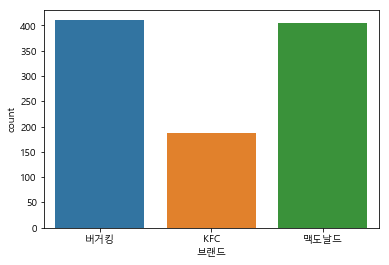

In [42]:
# 긱 브랜드별 지점수 비교
sns.countplot('브랜드', data=burger_df)
# 각 브랜드별 버거킹과 맥도날드의 지점수는 비슷하며, KFC는 가장 적은 지점을 보유하고 있다.

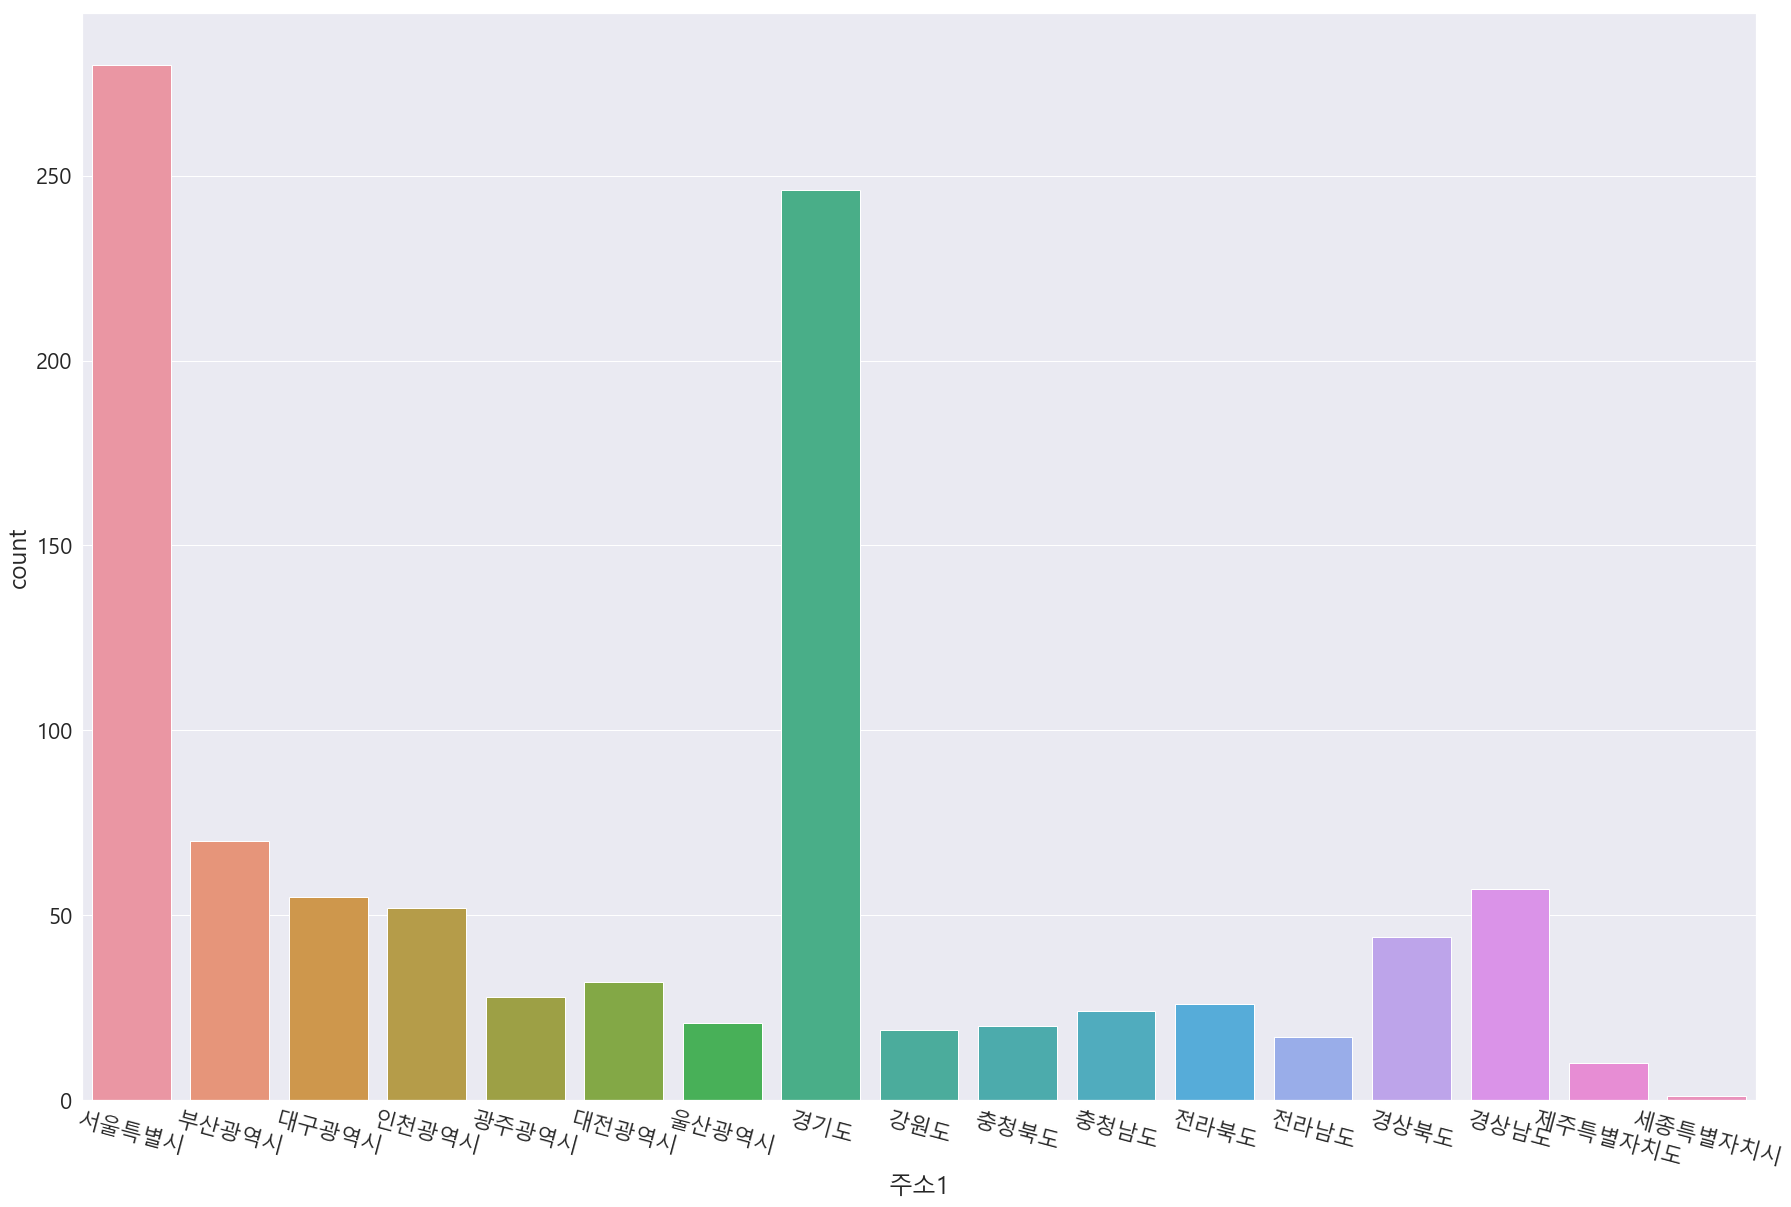

In [63]:
# 각 지역별 브랜드 비교
plt.figure(figsize=(30, 20))
plt.xticks(rotation = - 15 )
plt.xlabel('X bins')
plt.ylabel('Density')
plt.rcParams['font.size'] = 43
sns.countplot('주소1', data=burger_df)